In [0]:
# https://www.datacamp.com/courses/natural-language-processing-fundamentals-in-python

In [0]:
# -txt to  list
with open('/content/grail.txt', 'r') as f:
    holy_grail = f.readlines()  

In [0]:
# -txt to raw strings
with open('/content/grail.txt', 'r') as file:
    holy_grail = file.read()

In [0]:
# list to string

str1 = ' '.join(str(article) for article in articles)

str2 = ' '.join(map(str, articles))

### All modules and packages to be downloaded and imported

In [0]:
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import necessary modules
import nltk

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

from collections import Counter
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from collections import defaultdict
import spacy

In [0]:
! pip install polyglot numpy morfessor pycld2 pyicu

In [0]:
# ! pip install polyglot numpy morfessor pycld2 pyicu
import polyglot
from polyglot.text import Text

In [0]:
from polyglot.downloader import downloader
downloader.download("embeddings2.fr")
downloader.download("ner2.fr")

In [0]:
from polyglot.downloader import downloader
downloader.download("embeddings2.es")
downloader.download("ner2.es")

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import nltk
nltk.download('averaged_perceptron_tagger')

In [0]:
import nltk
nltk.download('maxent_ne_chunker')

In [0]:
import nltk
nltk.download('words')

## 1. Regular expressions & word tokenization

#### Introduction to regular expressions



*   \w+ : word

*   \d : digit
*   \s : space


*   .* : wildcard


*   (+) or * : greedy match [no parenthesis]

*   \S : not space
*   [a-z] : lowercase group






In [0]:
import re

In [0]:
my_string = "Let's write RegEx!"



*   Write a pattern called sentence_endings to match sentence endings (., ?, and !).
*   Use re.split() to split my_string on the pattern and print the result.



In [0]:
# Write a pattern to match sentence endings: sentence_endings
sentence_endings = r"[!|?|.]"

# Split my_string on sentence endings and print the result
print(re.split(sentence_endings, my_string))

["Let's write RegEx", '']


In [0]:
# Find all capitalized words in my_string and print the result
capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

['Let', 'RegEx']


In [0]:
# Split my_string on spaces and print the result
spaces = r"\s+"
print(re.split(spaces, my_string))

["Let's", 'write', 'RegEx!']


In [0]:
# Find all digits in my_string and print the result
digits = r"\d+"
print(re.findall(digits, my_string))

[]


#### Introduction to tokenization

**Word tokenization with NLTK**

Your job in this exercise is to utilize word_tokenize and sent_tokenize from nltk.tokenize to tokenize both words and sentences from Python strings - in this case, the first scene of Monty Python's Holy Grail.

In [0]:
scene_one = "SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a temperate zone.\nARTHUR: The swallow may fly south with the sun or the house martin or the plover may seek warmer climes in winter, yet these are not strangers to our land?\nSOLDIER #1: Are you suggesting coconuts migrate?\nARTHUR: Not at all.  They could be carried.\nSOLDIER #1: What?  A swallow carrying a coconut?\nARTHUR: It could grip it by the husk!\nSOLDIER #1: It's not a question of where he grips it!  It's a simple question of weight ratios!  A five ounce bird could not carry a one pound coconut.\nARTHUR: Well, it doesn't matter.  Will you go and tell your master that Arthur from the Court of Camelot is here.\nSOLDIER #1: Listen.  In order to maintain air-speed velocity, a swallow needs to beat its wings forty-three times every second, right?\nARTHUR: Please!\nSOLDIER #1: Am I right?\nARTHUR: I'm not interested!\nSOLDIER #2: It could be carried by an African swallow!\nSOLDIER #1: Oh, yeah, an African swallow maybe, but not a European swallow.  That's my point.\nSOLDIER #2: Oh, yeah, I agree with that.\nARTHUR: Will you ask your master if he wants to join my court at Camelot?!\nSOLDIER #1: But then of course a-- African swallows are non-migratory.\nSOLDIER #2: Oh, yeah...\nSOLDIER #1: So they couldn't bring a coconut back anyway...  [clop clop clop] \nSOLDIER #2: Wait a minute!  Supposing two swallows carried it together?\nSOLDIER #1: No, they'd have to have it on a line.\nSOLDIER #2: Well, simple!  They'd just use a strand of creeper!\nSOLDIER #1: What, held under the dorsal guiding feathers?\nSOLDIER #2: Well, why not?\n"

In [0]:
scene_one

"SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a t

In [0]:
# Import necessary modules
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
# Split scene_one into sentences: sentences
sentences = sent_tokenize(scene_one)
sentences

['SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!',
 '[clop clop clop] \nSOLDIER #1: Halt!',
 'Who goes there?',
 'ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.',
 'King of the Britons, defeator of the Saxons, sovereign of all England!',
 'SOLDIER #1: Pull the other one!',
 'ARTHUR: I am, ...  and this is my trusty servant Patsy.',
 'We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.',
 'I must speak with your lord and master.',
 'SOLDIER #1: What?',
 'Ridden on a horse?',
 'ARTHUR: Yes!',
 "SOLDIER #1: You're using coconuts!",
 'ARTHUR: What?',
 "SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.",
 'ARTHUR: So?',
 "We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?",
 'ARTHUR: We found them.',
 'SOLDIER #1: Found them?',
 'In Mercea?',
 "The coconut's tropic

In [0]:
# Use word_tokenize to tokenize the fourth sentence: tokenized_sent
tokenized_sent = word_tokenize(sentences[3])
tokenized_sent

['ARTHUR',
 ':',
 'It',
 'is',
 'I',
 ',',
 'Arthur',
 ',',
 'son',
 'of',
 'Uther',
 'Pendragon',
 ',',
 'from',
 'the',
 'castle',
 'of',
 'Camelot',
 '.']

In [0]:
# Make a set of unique tokens in the entire scene: unique_tokens
unique_tokens = set(word_tokenize(scene_one))

# Print the unique tokens result
print(unique_tokens)

{'Halt', 'It', 'these', 'lord', 'African', 'speak', 'Court', 'right', 'husk', 'here', 'minute', 'use', 'That', 'and', 'second', 'join', '2', 'swallows', ',', 'together', 'to', 'Pull', 'this', 'snows', 'But', 'them', 'who', 'migrate', 'They', 'coconut', 'We', 'Camelot', 'house', 'your', 'be', 'ratios', 'SCENE', 'wants', 'interested', 'dorsal', 'Found', 'weight', 'at', 'length', 'back', 'European', 'SOLDIER', 'have', 'Not', 'he', 'Oh', 'yeah', 'feathers', 'of', 'halves', '--', 'times', 'with', 'agree', 'swallow', 'found', 'mean', 'grip', 'one', 'Well', 'but', 'Yes', 'five', 'are', 'all', '...', 'on', 'creeper', 'Patsy', 'No', 'needs', 'its', 'south', 'am', 'plover', 'trusty', 'not', 'line', 'why', 'coconuts', 'where', 'Mercea', 'matter', 'course', '.', 'Whoa', 'Will', 'velocity', 'beat', 'wings', 'me', ':', 'servant', 'could', 'question', 'simple', 'two', 'order', 'carrying', 'they', 'KING', 'then', 'other', 'Ridden', '[', 'A', 'the', "'em", "n't", 'do', 'tropical', 'Listen', 'seek', 'AR

In [0]:
# Search for the first occurrence of "coconuts" in scene_one: match
match = re.search("coconuts", scene_one)

In [0]:
# Print the start and end indexes of match
print(match.start(), match.end())

580 588


In [0]:
# Write a regular expression to search for anything in square brackets: pattern1
pattern1 = r"\[.*\]"

In [0]:
# Use re.search to find the first text in square brackets
print(re.search(pattern1, scene_one))

<_sre.SRE_Match object; span=(9, 32), match='[wind] [clop clop clop]'>


In [0]:
# Find the script notation at the beginning of the fourth sentence and print it
pattern2 = r"[\w\s]+:"
print(re.match(pattern2, sentences[3]))

<_sre.SRE_Match object; span=(0, 7), match='ARTHUR:'>


#### Advanced tokenization with NLTK and regex

In [0]:
my_string = "SOLDIER #1: Found them? In Mercea? The coconut's tropical!"

**Choosing a tokenizer**

Given the following string, which of the below patterns is the best tokenizer? If possible, you want to retain sentence punctuation as separate tokens, but have '#1' remain a single token.

In [0]:
from nltk.tokenize import regexp_tokenize

In [0]:
pattern1 = '\\w+(\\?!)'
regexp_tokenize(my_string, pattern1)

[]

In [0]:
pattern2 = r'(\\w+|#\\d|\\?|!)'
regexp_tokenize(my_string, pattern2)

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [0]:
pattern3 = '(#\\d\\w+\\?!)'
regexp_tokenize(my_string, pattern3)

[]

In [0]:
pattern4 = r'\\s+'
regexp_tokenize(my_string, pattern4)

[]

**Regex with NLTK tokenization**

In this exercise, you'll build a more complex tokenizer for tweets with hashtags and mentions using nltk and regex. The `nltk.tokenize`.TweetTokenizer class gives you some extra methods and attributes for parsing tweets.

In [0]:
tweets = ['This is the best #nlp exercise ive found online! #python',
 '#NLP is super fun! <3 #learning',
 'Thanks @datacamp :) #nlp #python']

In [0]:
# Import the necessary modules
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer

In [0]:
# Define a regex pattern to find hashtags: pattern1
pattern1 = r"#\w+"

# Use the pattern on the first tweet in the tweets list
regexp_tokenize(tweets[0], pattern1)

['#nlp', '#python']

In [0]:
# Write a pattern that matches both mentions and hashtags
pattern2 = r"([@#]\w+)"

# Use the pattern on the last tweet in the tweets list
regexp_tokenize(tweets[-1], pattern2)

['@datacamp', '#nlp', '#python']

In [0]:
# Use the TweetTokenizer to tokenize all tweets into one list
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


**Non-ascii tokenization**

In this exercise, you'll practice advanced tokenization by tokenizing some non-ascii based text. You'll be using German with emoji!


Unicode ranges for emoji are:

('\U0001F300'-'\U0001F5FF'), 

('\U0001F600-\U0001F64F'), 

('\U0001F680-\U0001F6FF'), and 

('\u2600'-\u26FF-\u2700-\u27BF').

In [0]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import regexp_tokenize

In [0]:
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

In [0]:
# Tokenize and print all words in german_text
all_words = word_tokenize(german_text)
print(all_words)

Make sure to check for the German Ü!

In [0]:
# Tokenize and print only capital words
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text, capital_words))

['Wann', 'Pizza', 'Und', 'Über']


In [0]:
# Tokenize and print only emoji
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['🍕', '🚕']


#### Charting word length with NLTK

In [0]:
import matplotlib.pyplot as plt

In [0]:
from nltk.tokenize import regexp_tokenize

In [0]:
import pandas as pd

In [0]:
# txt to list
with open('/content/grail.txt', 'r') as f:
    holy_grail = f.readlines()   

In [0]:
# datacamp version - txt to string

with open('/content/grail.txt', 'r') as file:
    holy_grail = file.read()

In [0]:
holy_grail

"SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a t

In [0]:
len(holy_grail) # 65003

65003

In [0]:
# Split the script into lines: lines
lines = holy_grail.split('\n')

In [0]:
# Replace all script lines for speaker
pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

In [0]:
# Tokenize each line: tokenized_lines
tokenized_lines = [regexp_tokenize(s, '\w+') for s in lines]
len(tokenized_lines) # 1192

1192

In [0]:
# Make a frequency list of lengths: line_num_words
line_num_words = [len(t_line) for t_line in tokenized_lines]
len(line_num_words) # 1192

1192

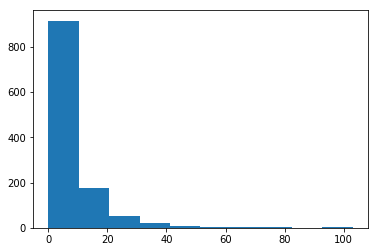

In [0]:
# Plot a histogram of the line lengths
plt.hist(line_num_words)

# Show the plot
plt.show()

## 2. Simple topic identification

#### Word counts with bag-of-words

In [0]:
with open('/content/wiki_text_debugging.txt', 'r') as file:
    article = file.read()

In [0]:
article

'\'\'\'Debugging\'\'\' is the process of finding and resolving of defects that prevent correct operation of computer software or a system.  \n\nNumerous books have been written about debugging (see below: #Further reading|Further reading), as it involves numerous aspects, including interactive debugging, control flow, integration testing, Logfile|log files, monitoring (Application monitoring|application, System Monitoring|system), memory dumps, Profiling (computer programming)|profiling, Statistical Process Control, and special design tactics to improve detection while simplifying changes.\n\nOrigin\nA computer log entry from the Mark&nbsp;II, with a moth taped to the page\n\nThe terms "bug" and "debugging" are popularly attributed to Admiral Grace Hopper in the 1940s.[http://foldoc.org/Grace+Hopper Grace Hopper]  from FOLDOC While she was working on a Harvard Mark II|Mark II Computer at Harvard University, her associates discovered a moth stuck in a relay and thereby impeding operatio

In [0]:
# Import Counter
from collections import Counter

In [0]:
# Tokenize the article: tokens
tokens = word_tokenize(article)
tokens

["'",
 "''",
 'Debugging',
 "''",
 "'",
 'is',
 'the',
 'process',
 'of',
 'finding',
 'and',
 'resolving',
 'of',
 'defects',
 'that',
 'prevent',
 'correct',
 'operation',
 'of',
 'computer',
 'software',
 'or',
 'a',
 'system',
 '.',
 'Numerous',
 'books',
 'have',
 'been',
 'written',
 'about',
 'debugging',
 '(',
 'see',
 'below',
 ':',
 '#',
 'Further',
 'reading|Further',
 'reading',
 ')',
 ',',
 'as',
 'it',
 'involves',
 'numerous',
 'aspects',
 ',',
 'including',
 'interactive',
 'debugging',
 ',',
 'control',
 'flow',
 ',',
 'integration',
 'testing',
 ',',
 'Logfile|log',
 'files',
 ',',
 'monitoring',
 '(',
 'Application',
 'monitoring|application',
 ',',
 'System',
 'Monitoring|system',
 ')',
 ',',
 'memory',
 'dumps',
 ',',
 'Profiling',
 '(',
 'computer',
 'programming',
 ')',
 '|profiling',
 ',',
 'Statistical',
 'Process',
 'Control',
 ',',
 'and',
 'special',
 'design',
 'tactics',
 'to',
 'improve',
 'detection',
 'while',
 'simplifying',
 'changes',
 '.',
 'Origin'

In [0]:
# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]
lower_tokens

["'",
 "''",
 'debugging',
 "''",
 "'",
 'is',
 'the',
 'process',
 'of',
 'finding',
 'and',
 'resolving',
 'of',
 'defects',
 'that',
 'prevent',
 'correct',
 'operation',
 'of',
 'computer',
 'software',
 'or',
 'a',
 'system',
 '.',
 'numerous',
 'books',
 'have',
 'been',
 'written',
 'about',
 'debugging',
 '(',
 'see',
 'below',
 ':',
 '#',
 'further',
 'reading|further',
 'reading',
 ')',
 ',',
 'as',
 'it',
 'involves',
 'numerous',
 'aspects',
 ',',
 'including',
 'interactive',
 'debugging',
 ',',
 'control',
 'flow',
 ',',
 'integration',
 'testing',
 ',',
 'logfile|log',
 'files',
 ',',
 'monitoring',
 '(',
 'application',
 'monitoring|application',
 ',',
 'system',
 'monitoring|system',
 ')',
 ',',
 'memory',
 'dumps',
 ',',
 'profiling',
 '(',
 'computer',
 'programming',
 ')',
 '|profiling',
 ',',
 'statistical',
 'process',
 'control',
 ',',
 'and',
 'special',
 'design',
 'tactics',
 'to',
 'improve',
 'detection',
 'while',
 'simplifying',
 'changes',
 '.',
 'origin'

In [0]:
# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
print(bow_simple.most_common(10))

[(',', 151), ('the', 150), ('.', 89), ('of', 81), ("''", 68), ('to', 63), ('a', 60), ('in', 44), ('and', 41), ('debugging', 40)]


#### Simple text preprocessing

Examples of preprocessing



*   Tokenization to create a bag of words

*   Lowercasing words
*   Lemmatization/Stemming (shorten words to their root stems)


*   Removing stop words, punctuation, or unwanted tokens



In [0]:
len(lower_tokens) # 2895

2895

In [0]:
# -txt to  list
with open('/content/english_stopwords.txt', 'r') as f:
    english_stops = f.readlines()  

In [0]:
len(english_stops) # 153, one missing word

153

In [0]:
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

In [0]:
# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

In [0]:
# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in english_stops]

In [0]:
# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

In [0]:
# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(10))

[('the', 150), ('of', 81), ('a', 81), ('to', 63), ('in', 44), ('and', 41), ('debugging', 40), ('for', 26), ('is', 25), ('or', 25)]


#### Introduction to gensim


gensim:



*   popular open-source NLP library
*   uses top academic models to perform complex tasks


> *   Building document or word vectors
> *   Performing topic identification and document comparison






Word vectors:



*   Word vectors are multi-dimensional mathematical representations of words created using deep learning methods. They give us insight into relationships between words in a corpus.



In [0]:
# dataset not available
len(articles) # 12

In [0]:
# Import Dictionary
from gensim.corpora.dictionary import Dictionary

In [0]:
# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(articles)

In [0]:
# Select the id for "computer": computer_id
computer_id = dictionary.token2id.get("computer")

In [0]:
# Use computer_id with the dictionary to print the word
print(dictionary.get(computer_id))

In [0]:
# Create a MmCorpus: corpus
corpus = [dictionary.doc2bow(article) for article in articles]

In [0]:
# Print the first 10 word ids with their frequency counts from the fifth document
print(corpus[4][:10])

**Gensim bag-of-words**

Now, you'll use your new gensim corpus and dictionary to see the most common terms per document and across all documents. You can use your dictionary to look up the terms. Take a guess at what the topics are and feel free to explore more documents in the IPython Shell!

In [0]:
# Save the fifth document: doc
doc = corpus[4]

In [0]:
# Sort the doc for frequency: bow_doc
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

In [0]:
# Print the top 5 words of the document alongside the count
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)

In [0]:
# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

In [0]:
# Create a sorted list from the defaultdict: sorted_word_count 
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

In [0]:
# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

#### Tf-idf with gensim

Given a corpus containing 200 documents, with 20 documents mentioning the word "computer", tf-idf can be calculated by multiplying term frequency with inverse document frequency.

**Term frequency** = percentage share of the word compared to all tokens in the document 

**Inverse document frequency** = logarithm of the total number of documents in a corpora divided by the number of documents containing the term


In [0]:
# Import TfidfModel
from gensim.models.tfidfmodel import TfidfModel

In [0]:
# Create a new TfidfModel using the corpus: tfidf
tfidf = TfidfModel(corpus)

In [0]:
# Calculate the tfidf weights of doc: tfidf_weights
tfidf_weights = tfidf[doc]

In [0]:
# Print the first five weights
print(tfidf_weights[:5])

In [0]:
# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

In [0]:
# Print the top 5 weighted words
for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)

## 3. Named-entity recognition

#### Named Entity Recognition (NER)

In [0]:
article = open("uber_apple.txt", "r")
print(article.read())

﻿The taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.


Uber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tried to hir

In [0]:
type(article)

_io.TextIOWrapper

In [0]:
with open('uber_apple.txt', 'r') as file:
    article = file.read()

In [0]:
article

'\ufeffThe taxi-hailing company Uber brings into very sharp focus the question of whether corporations can be said to have a moral character. If any human being were to behave with the single-minded and ruthless greed of the company, we would consider them sociopathic. Uber wanted to know as much as possible about the people who use its service, and those who don’t. It has an arrangement with unroll.me, a company which offered a free service for unsubscribing from junk mail, to buy the contacts unroll.me customers had had with rival taxi companies. Even if their email was notionally anonymised, this use of it was not something the users had bargained for. Beyond that, it keeps track of the phones that have been used to summon its services even after the original owner has sold them, attempting this with Apple’s phones even thought it is forbidden by the company.\n\n\nUber has also tweaked its software so that regulatory agencies that the company regarded as hostile would, when they tri

In [0]:
type(article)

str

**NER with NLTK**

Your task is to use nltk to find the named entities in this article.

What might the article be about, given the names you found?






In [0]:
from nltk.tokenize import sent_tokenize, word_tokenize

*   Tokenize article into sentences.

In [0]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)


*   Tokenize each sentence in sentences into words using a list comprehension.



In [0]:
# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]



*   Inside a list comprehension, tag each tokenized sentence into parts of speech using nltk.pos_tag().

In [0]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 


*   Chunk each tagged sentence into named-entity chunks using `nltk.ne_chunk_sents()`. Along with pos_sentences, specify the additional keyword argument `binary=True`.


In [0]:
import nltk
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [0]:
# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

In [0]:
chunked_sentences

<generator object ParserI.parse_sents.<locals>.<genexpr> at 0x7f4931635938>



*   Loop over each sentence and each chunk, and test whether it is a named-entity chunk by testing if it has the attribute label, and if the `chunk.label()` is equal to "NE". If so, print that chunk.

In [0]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [0]:
# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


**Charting practice**

You'll use a defaultdict called ner_categories, with keys representing every named entity group type, and values to count the number of each different named entity type. You have a chunked sentence list called chunked_sentences similar to the last exercise, but this time with non-binary category names.

You can use hasattr() to determine if each chunk has a 'label' and then simply use the chunk's .label() method as the dictionary key.

In [0]:
from collections import defaultdict

In [0]:
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

Fill up the dictionary with values for each of the keys. Remember, the keys will represent the label().



*   In the outer for loop, iterate over chunked_sentences, using sent as your iterator variable.
*   In the inner for loop, iterate over sent. If the condition is true, increment the value of each key by 1.



In [0]:
# change to NON-BINARY for next exercise
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=False)

In [0]:
# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1



*   For the pie chart labels, create a list called labels from the keys of ner_categories, which can be accessed using .keys().



In [0]:
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())



*   Use a list comprehension to create a list called values, using the .get() method on ner_categories to compute the values of each label l.



In [0]:
# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]



*   Use plt.pie() to create a pie chart for each of the NER categories. Along with values and labels=labels, pass the extra keyword arguments autopct='%1.1f%%' and startangle=140 to add percentages to the chart and rotate the initial start angle.



In [0]:
labels

['GPE', 'PERSON', 'ORGANIZATION']

In [0]:
values

[2, 7, 1]

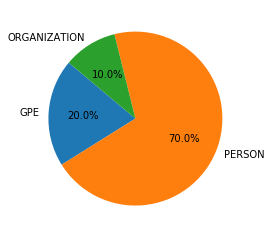

In [0]:
# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

#### Introduction to SpaCy

**Comparing NLTK with spaCy NER**



*   Import spacy.

*   Load the 'en' model using spacy.load(). Specify the additional keyword arguments tagger=False, parser=False, matcher=False.
*   Create a spacy document object by passing article into nlp().


*   Using ent as your iterator variable, iterate over the entities of doc and print out the labels (ent.label_) and text (ent.text).



In [0]:
# Import spacy
import spacy

In [0]:
# Instantiate the English model: nlp
nlp = spacy.load('en', tagger=False, parser=False, matcher=False)

In [0]:
# Create a new document: doc
doc = nlp(article)

In [0]:
# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)

ORG Uber
ORG Uber
ORG Apple
ORG Uber
PERSON Travis Kalanick
ORG Uber
PERSON Tim Cook
ORG Apple
ORG Uber
GPE drivers’
LOC Silicon Valley’s
ORG Yahoo
PERSON Marissa Mayer
MONEY $186m


#### Multilingual NER with polyplot

In [0]:
! pip install polyglot numpy morfessor pycld2 pyicu

     |████████████████████████████████| 14.3MB 7.2MB/s 
     |████████████████████████████████| 215kB 42.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/43/74/e2/92a807d8662f5a0df908ba20887f8ad02bf1b130d3939b65b7
  Stored in directory: /root/.cache/pip/wheels/7b/44/44/ec4c5e25e095f02aa0e63ef2bf0cc8badda5877330ffa5fbe4
  Stored in directory: /root/.cache/pip/wheels/3f/45/7e/ccee9f1fe52787595e92641b5645cdf2cb40096749b39b4422
Successfully built morfessor pycld2 pyicu


In [0]:
# ! pip install polyglot numpy morfessor pycld2 pyicu
import polyglot
from polyglot.text import Text

**French NER with polyglot**

In [0]:
with open("french.txt", "r") as file:
  article = file.read()

In [0]:
type(article) # str

str

In [0]:
# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

In [0]:
from polyglot.downloader import downloader
downloader.download("embeddings2.fr")
downloader.download("ner2.fr")

[polyglot_data] Downloading package embeddings2.fr to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package embeddings2.fr is already up-to-date!
[polyglot_data] Downloading package ner2.fr to /root/polyglot_data...


True

In [0]:
# Print each of the entities found
for ent in txt.entities:
    print(ent)

['Charles', 'Cuvelliez']
['Charles', 'Cuvelliez']
['Bruxelles']
['l’IA']
['Julien', 'Maldonato']
['Deloitte']
['Ethiquement']
['l’IA']
['.']


In [0]:
# Print the type of ent
print(type(ent))

<class 'polyglot.text.Chunk'>


Use a list comprehension to create a list of tuples called entities.



*   The first element of each tuple is the entity tag, which you can access using its .tag attribute.
*   The second element is the full string of the entity text, which you can access using ' '.join(ent).



In [0]:
# Create the list of tuples: entities
entities =  [(ent.tag, ' '.join(ent)) for ent in txt.entities]

In [0]:
# Print entities
print(entities)

[('I-PER', 'Charles Cuvelliez'), ('I-PER', 'Charles Cuvelliez'), ('I-ORG', 'Bruxelles'), ('I-PER', 'l’IA'), ('I-PER', 'Julien Maldonato'), ('I-ORG', 'Deloitte'), ('I-PER', 'Ethiquement'), ('I-LOC', 'l’IA'), ('I-PER', '.')]


**Spanish NER with polyglot**

In [0]:
with open("spanish.txt", "r") as file:
  spanish = file.read()
txt = Text(spanish)  

In [0]:
txt

Text("﻿﻿Lina del Castillo es profesora en el Instituto de Estudios Latinoamericanos Teresa Lozano Long (LLILAS) y el Departamento de Historia de la Universidad de Texas en Austin. Ella será la moderadora del panel “Los Mundos Políticos de Gabriel García Márquez” este viernes, Oct. 30, en el simposio Gabriel García Márquez: Vida y Legado.


LIna del Castillo


Actualmente, sus investigaciones abarcan la intersección de cartografía, disputas a las demandas de tierra y recursos, y la formación del n...el tren de medianoche que lleva a miles y miles de cadáveres uno encima del otro como tantos racimos del banano que acabarán tirados al mar. Ningún recuento periodístico podría provocar nuestra imaginación y nuestra memoria como este relato de García Márquez.


Contenido Relacionado


Lea más artículos sobre el archivo de Gabriel García Márquez


Reciba mensualmente las últimas noticias e información del Harry Ransom Center con eNews, nuestro correo electrónico mensual. ¡Suscríbase hoy!")

In [0]:
# Initialize the count variable: count
count = 0

In [0]:
from polyglot.downloader import downloader
downloader.download("embeddings2.es")
downloader.download("ner2.es")

[polyglot_data] Downloading package embeddings2.es to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package embeddings2.es is already up-to-date!
[polyglot_data] Downloading package ner2.es to /root/polyglot_data...


True

In [0]:
# Iterate over all the entities
for ent in txt.entities:
    # Check whether the entity contains 'Márquez' or 'Gabo'
    if 'Márquez' in ent or 'Gabo' in ent:
        # Increment count
        count += 1

In [0]:
# Print count
print(count)

4


In [0]:
# Calculate the percentage of entities that refer to "Gabo": percentage
percentage = count / len(txt.entities)
print(percentage)

0.26666666666666666


In [0]:
txt = ['Lina']
['Castillo']
['Teresa', 'Lozano', 'Long']
['Universidad', 'de', 'Texas']
['Austin']
['Austin', '.']
['Austin', '.', 'Ella']
['Gabriel', 'García', 'Márquez']
['Gabriel', 'García', 'Márquez']
['LIna']
['Castillo']
['colombiano']
['Colombia']
['Estados', 'Unidos']
['Castillo']
['Nation']
['Kenneth', 'Nebenzahl']
['Jr']
['Library']
['Society']
['Humboldt']
['América', 'Latina']
['.', 'García', 'Márquez']
['colombiano']
['Gabriel', 'García', 'Márquez']
['Gabo']
['Fidel', 'Castro']
['Gabo']
['Castro']
['colombianos']
['Gabo']
['colombiano']
['colombiano', 'Belisario', 'Betancur']
['Betancur']
['Fuerzas', 'Armadas', 'Revolucionarias', 'de', 'Colombia']
['FARC']
['Gabo']
['Cuba']
['Betancur']
['Gabo']
['Cuba']
['.', 'Betancur']
['Gabriel', 'García', 'Márquez']
['Gabo']
['San', 'Vicente', 'del', 'Caguán']
['Andrés', 'Patrana']
['FARC']
['Gabo']
['Pastrana']
['Ejército', 'de', 'Liberación', 'Nacional']
['ELN']
['García', 'Márquez']
['Mercedes', 'Barcha']
['ELN']
['La', 'Habana']
['Gabo']
['La', 'Habana']
['Gabo']
['Fidel', 'Castro']
['Gabriel', 'García', 'Márquez']
['Fidel', 'Castro']
['Gabriel', 'García', 'Márquez']
['Carmen', 'Balcells']
['La', 'Habana']
['Estados', 'Unidos']
['Colombia']
['.', 'Gabriel', 'García', 'Márquez']
['Gabo']
['Salman', 'Rushdie']
['Elena', 'Poniatowska']
['Gabo']
['Gabo']
['Gabriel', 'García', 'Márquez']
['García', 'Márquez']
['Macondo']
['colombiana']
['United', 'Fruit', 'Company']
['colombiano']
['Ciénaga']
['Santa']
['Santa', 'Marta']
['García', 'Márquez']
['York']
['Español']
['José', 'Arcadio', 'Segundo']
['García', 'Márquez']
['United', 'Fruit']
['Colombia']
['Macondo']
['Gabo']
['Gabo']
['Ciénaga']
['colombiana']
['José', 'Arcadio', 'Segundo']
['García', 'Márquez']
['Gabriel', 'García', 'Márquez']
['Harry', 'Ransom']
['Harry', 'Ransom', 'Center']

['Harry', 'Ransom', 'Center']

## 4. Building a "fake news" classifier

#### Classifying fake news using supervised learning with NLP

In [0]:
df = pd.read_csv('fake_or_real_news.csv')
print("df shape: ", df.shape) # (6335, 4)
df.head(5)

df shape:  (6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [0]:
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [0]:
# Print the head of df
print(df.head())

   Unnamed: 0  ... label
0        8476  ...  FAKE
1       10294  ...  FAKE
2        3608  ...  REAL
3       10142  ...  FAKE
4         875  ...  REAL

[5 rows x 4 columns]


In [0]:
# Create a series to store the labels: y
y = df.label

In [0]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

In [0]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

In [0]:
# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

In [0]:
# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

In [0]:
# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


**TfidfVectorizer for text classification**



In [0]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

In [0]:
# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

In [0]:
# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [0]:
# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '00000031', '000035', '00006', '0001', '0001pt', '000ft', '000km']


In [0]:
# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Inspecting the vectors**

Create the DataFrames `count_df` and `tfidf_df` by using `pd.DataFrame()` and specifying the values as the first argument and the columns (or features) as the second argument.




*   The values can be accessed by using the .A attribute of, respectively, `count_train` and `tfidf_train`.
*   The columns can be accessed using the `.get_feature_names()` methods of `count_vectorizer` and `tfidf_vectorizer`.



In [0]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

In [0]:
# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

In [0]:
# Print the head of count_df
print(count_df.head())

   00  000  0000  00000031  000035  00006  ...  ما  محاولات  من  هذا  والمرضى  ยงade
0   0    0     0         0       0      0  ...   0        0   0    0        0      0
1   0    0     0         0       0      0  ...   0        0   0    0        0      0
2   0    0     0         0       0      0  ...   0        0   0    0        0      0
3   0    0     0         0       0      0  ...   0        0   0    0        0      0
4   0    0     0         0       0      0  ...   0        0   0    0        0      0

[5 rows x 56922 columns]


In [0]:
# Print the head of tfidf_df
print(tfidf_df.head())

    00  000  0000  00000031  000035  ...  محاولات   من  هذا  والمرضى  ยงade
0  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
1  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
2  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
3  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0
4  0.0  0.0   0.0       0.0     0.0  ...      0.0  0.0  0.0      0.0    0.0

[5 rows x 56922 columns]


In [0]:
# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

set()


In [0]:
# Check whether the DataFrames are equal
print(count_df.equals(tfidf_df))

False




*   Test if the column names are the same for each DataFrame by creating a new object called difference to see the difference between the columns that count_df has from tfidf_df. Columns can be accessed using the .columns attribute of a DataFrame. Subtract the set of tfidf_df.columns from the set of count_df.columns.



#### Training and testing a classification model with scikit-learn

In [0]:
# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

In [0]:
# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

In [0]:
# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

In [0]:
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

0.893352462936394


**Training and testing the "fake news" model with TfidfVectorizer**



In [0]:
# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

In [0]:
# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

In [0]:
# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

In [0]:
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

0.8565279770444764


In [0]:
# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print(cm)

[[ 739  269]
 [  31 1052]]


#### Simple NLP, complex problems

Possible ways to improve the model:



*   Tweaking alpha levels.
*   Trying a new classification model.



*   Training on a larger dataset.
*   Improving text preprocessing.



**Improving your model**

In [0]:
import numpy as np

In [0]:
# Create the list of alphas: alphas
alphas = np.arange(0, 1, 0.1)

In [0]:
# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

In [0]:
# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print('\n')

Alpha:  0.0
Score:  0.8813964610234337


Alpha:  0.1
Score:  0.8976566236250598


Alpha:  0.2
Score:  0.8938307030129125


Alpha:  0.30000000000000004
Score:  0.8900047824007652


Alpha:  0.4
Score:  0.8857006217120995


Alpha:  0.5


/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Score:  0.8842659014825442


Alpha:  0.6000000000000001
Score:  0.874701099952176


Alpha:  0.7000000000000001
Score:  0.8703969392635102


Alpha:  0.8
Score:  0.8660927785748446


Alpha:  0.9
Score:  0.8589191774270684




**Inspecting your model**

Now that you have built a "fake news" classifier, you'll investigate what it has learned. You can map the important vector weights back to actual words using some simple inspection techniques.



*   Save the class labels as class_labels by accessing the .classes_ attribute of nb_classifier.



In [0]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_



*   Extract the features using the .get_feature_names() method of tfidf_vectorizer.



In [0]:
# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()



*   Create a zipped array of the classifier coefficients with the feature names and sort them by the coefficients. To do this, first use zip() with the arguments nb_classifier.coef_[0] and feature_names. Then, use sorted() on this.


In [0]:
# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))



*   Print the top 20 weighted features for the first label of class_labels.
*   Print the bottom 20 weighted features for the second label of class_labels.



In [0]:
# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

FAKE [(-11.316312804238807, '0000'), (-11.316312804238807, '000035'), (-11.316312804238807, '0001'), (-11.316312804238807, '0001pt'), (-11.316312804238807, '000km'), (-11.316312804238807, '0011'), (-11.316312804238807, '006s'), (-11.316312804238807, '007'), (-11.316312804238807, '007s'), (-11.316312804238807, '008s'), (-11.316312804238807, '0099'), (-11.316312804238807, '00am'), (-11.316312804238807, '00p'), (-11.316312804238807, '00pm'), (-11.316312804238807, '014'), (-11.316312804238807, '015'), (-11.316312804238807, '018'), (-11.316312804238807, '01am'), (-11.316312804238807, '020'), (-11.316312804238807, '023')]


In [0]:
# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

REAL [(-7.742481952533027, 'states'), (-7.717550034444668, 'rubio'), (-7.703583809227384, 'voters'), (-7.654774992495461, 'house'), (-7.649398936153309, 'republicans'), (-7.6246184189367, 'bush'), (-7.616556675728881, 'percent'), (-7.545789237823644, 'people'), (-7.516447881078008, 'new'), (-7.448027933291952, 'party'), (-7.411148410203476, 'cruz'), (-7.410910239085596, 'state'), (-7.35748985914622, 'republican'), (-7.33649923948987, 'campaign'), (-7.2854057032685775, 'president'), (-7.2166878130917755, 'sanders'), (-7.108263114902301, 'obama'), (-6.724771332488041, 'clinton'), (-6.5653954389926845, 'said'), (-6.328486029596207, 'trump')]
